In [38]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
import warnings
warnings.filterwarnings('ignore')# 데이터셋 생성

In [40]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
df = pd.DataFrame(data, columns=[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
    'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
])
df['PRICE'] = target
df# X AND Y SPLIT
y = df['PRICE']
x = df.drop(['PRICE'], axis=1)


In [41]:
# TRAIN AND TEST SPLIT
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

[4.61308766 1.51911841 2.16567835 1.1173208  2.49816938 2.40419062
 2.25886839 1.45062305 1.73231015 2.02634729 1.54262538 1.89066594
 4.82894157]


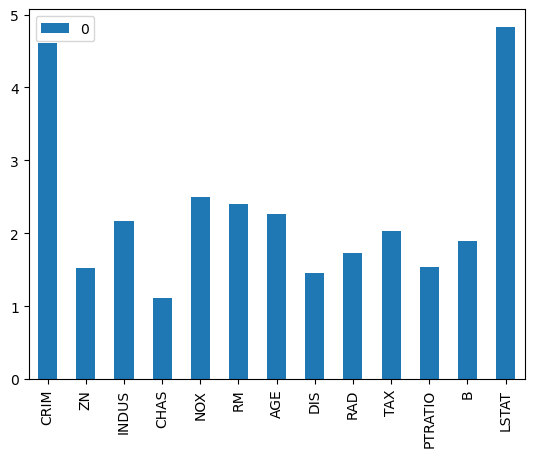

In [ ]:
# Univariate feature selection
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
# Feature Selection: Univariate Selection
test = SelectKBest(score_func=f_classif, k=4)  # Select top 4 features
fit = test.fit(x_train, y_train)
# Print the feature scores
print(fit.scores_)  # Scores for each feature
# Visualize the scores
score_df = pd.DataFrame(fit.scores_, index=x_train.columns)
score_df.plot(kind='bar')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# PCA 적용: 주요 구성요소 3개 선택
pca = PCA(n_components=3)
fit = pca.fit(x_train)

# 설명된 분산 비율 출력 (각 주성분이 설명하는 데이터의 분산 비율)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
# 주요 성분에 포함된 변수들 출력 (주성분의 가중치 확인)
print(fit.components_.T)
print(pca.transform(x_train))

Explained Variance: [0.80082761 0.16675598 0.02243715]
[[ 3.01453467e-02  3.37601129e-03 -1.45635520e-02]
 [-4.14085468e-02 -3.55085824e-03  6.22618700e-01]
 [ 2.82080207e-02 -3.66926555e-03 -9.24018371e-02]
 [ 2.93474682e-06 -1.66367731e-04 -8.28396343e-04]
 [ 4.50491469e-04 -5.80054786e-06 -1.89692316e-03]
 [-1.14163044e-03  4.65380528e-04  4.02408362e-03]
 [ 7.88794588e-02 -1.71517437e-03 -7.64831712e-01]
 [-6.60587928e-03  2.35832469e-04  4.69253843e-02]
 [ 4.50307779e-02 -9.84853829e-03 -1.33277927e-03]
 [ 9.47952662e-01 -3.00025791e-01  8.76344880e-02]
 [ 5.63838715e-03 -2.48964303e-03 -1.15615139e-02]
 [-2.98554412e-01 -9.53848299e-01 -2.84922213e-02]
 [ 2.24774725e-02  3.74749704e-03 -8.81968561e-02]]
[[ 254.61628502  -72.21140567   -8.08361011]
 [-104.68934169   -8.32060058   -6.94174721]
 [-101.90209261   24.38564148   41.3403782 ]
 ...
 [-134.6095185     4.02837404   62.15663259]
 [ 325.79097519  156.34532736    1.01614746]
 [  67.6630467   278.3523028   -13.34774823]]


Num Features: 3
Selected Features: [False False False  True  True  True False False False False False False
 False]
Feature Ranking: [ 5  8  7  1  1  1 11  3  6 10  2  9  4]


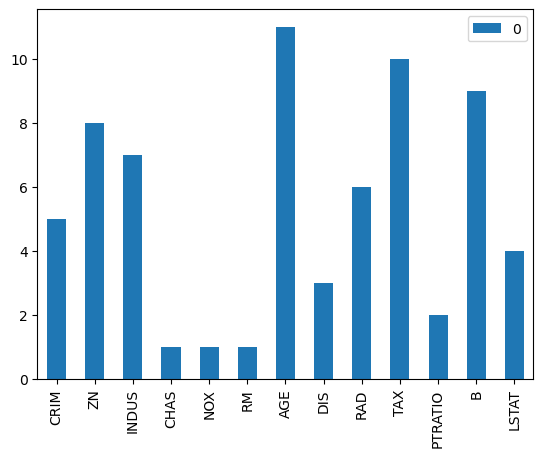

In [44]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()

rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(x_train, y_train)

print(f"Num Features: {fit.n_features_}")
print(f"Selected Features: {fit.support_}")
print(f"Feature Ranking: {fit.ranking_}")

score_df = pd.DataFrame(fit.ranking_, index=x_train.columns)
score_df.plot(kind='bar')
plt.show()# X AND Y SPLIT


[0.03550218 0.00153534 0.00984672 0.00065897 0.01268282 0.51923284
 0.00936989 0.06423667 0.00225994 0.01809951 0.01432703 0.0185044
 0.29374369]


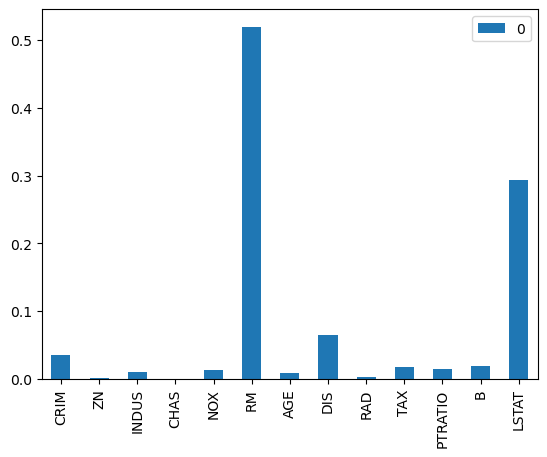

In [45]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Random Forest Regressor 모델 생성
model = RandomForestRegressor(n_estimators=10)  # 트리 개수 설정

model.fit(x_train, y_train)

print(model.feature_importances_)  # 중요도가 높은 변수 선택

# 중요도 점수를 DataFrame으로 변환
score_df = pd.DataFrame(model.feature_importances_, index=x_train.columns)

# 중요도 점수 시각화
score_df.plot(kind='bar')
plt.show()
